Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


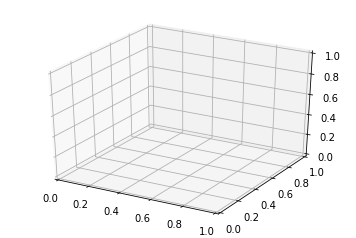

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
projection='3D'
from itertools import product, combinations
%pylab inline



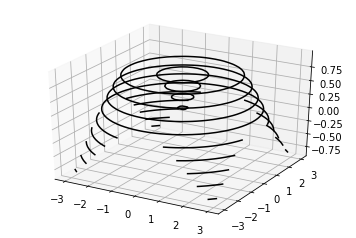

In [66]:
cm=plt.cm.get_cmap('RdYlBu')
color=np.arange(num)
num=1024
#x=np.linspace(-4,4,num)
#y=np.linspace(-4,4,num)
X,Y=np.mgrid[-3:3:30j,-3:3:30j]
z=np.sin((X**2+Y**2)**0.5)
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.contour(X,Y,z,10,lw=1,cmap='autumn_r',linestyles='solid',offset=-1)
ax.contour(X,Y,z,10,lw=1,colors='k',linestyles='solid')

In [60]:

#ax.colorbar(label='time/s')
#ax.legend()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


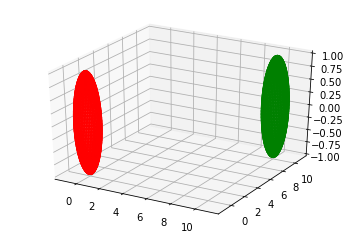

In [2]:

#ax.set_aspect("equal")
# draw sphere
u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
ax.plot_wireframe(x+10, y+10, z, color="g")


#ax.set_animated(True)
#ax.set_adjustable()
ax.set_transform(True)
fig.show()

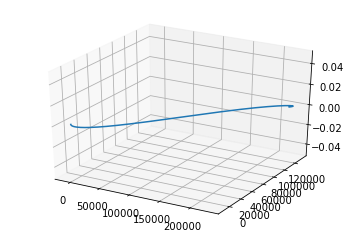

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

me = 5.974 * 10 ** (24)  #  mass of the earth                                     
mm = 7.348 * 10 ** (22)  #  mass of the moon                                      
G = 6.67259 * 10 ** (-20)  #  gravitational parameter                             
re = 6378.0  #  radius of the earth in km                                         
rm = 1737.0  #  radius of the moon in km                                          
r12 = 384400.0  #  distance between the CoM of the earth and moon                 
M = me + mm

pi1 = me / M
pi2 = mm / M
mue = 398600.0  #  gravitational parameter of earth km^3/sec^2                    
mum = G * mm  #  grav param of the moon                                           
mu = mue + mum
omega = np.sqrt(mu / r12 ** 3)
nu = -129.21 * np.pi / 180  #  true anomaly angle in radian                       

x = 327156.0 - 4671
#  x location where the moon's SOI effects the spacecraft with the offset of the  
#  Earth not being at (0,0) in the Earth-Moon system                              
y = 33050.0   #  y location                                                       

vbo = 10.85  #  velocity at burnout                                               

gamma = 0 * np.pi / 180  #  angle in radians of the flight path                   

vx = vbo * (np.sin(gamma) * np.cos(nu) - np.cos(gamma) * np.sin(nu))
#  velocity of the bo in the x direction                                          
vy = vbo * (np.sin(gamma) * np.sin(nu) + np.cos(gamma) * np.cos(nu))
#  velocity of the bo in the y direction                                          

xrel = (re + 300.0) * np.cos(nu) - pi2 * r12
#  spacecraft x location relative to the earth         
yrel = (re + 300.0) * np.sin(nu)

#  r0 = [xrel, yrel, 0]                                                           
#  v0 = [vx, vy, 0]                                                               
u0 = [xrel, yrel, 0, vx, vy, 0]


def deriv(u, dt):
    n1 = -((mue * (u[0] + pi2 * r12) / np.sqrt((u[0] + pi2 * r12) ** 2
                                               + u[1] ** 2) ** 3)
        - (mum * (u[0] - pi1 * r12) / np.sqrt((u[0] - pi1 * r12) ** 2
                                              + u[1] ** 2) ** 3))
    n2 = -((mue * u[1] / np.sqrt((u[0] + pi2 * r12) ** 2 + u[1] ** 2) ** 3)
        - (mum * u[1] / np.sqrt((u[0] - pi1 * r12) ** 2 + u[1] ** 2) ** 3))
    return [u[3],  #  dotu[0] = u[3]                                              
            u[4],  #  dotu[1] = u[4]                                              
            u[5],  #  dotu[2] = u[5]                                              
            2 * omega * u[5] + omega ** 2 * u[0] + n1,  #  dotu[3] = that         
            omega ** 2 * u[1] - 2 * omega * u[4] + n2,  #  dotu[4] = that         
            0]  #  dotu[5] = 0                                                    


dt = np.arange(0.0, 320000.0, 1)  #  200000 secs to run the simulation            
u = odeint(deriv, u0, dt)
x, y, z, x2, y2, z2 = u.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

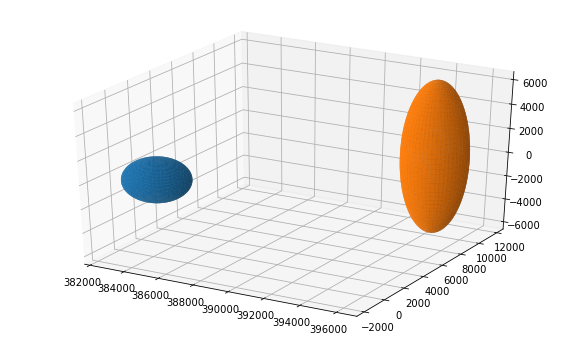

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
xm = rm * np.outer(np.cos(phi), np.sin(theta)) + r12
ym = rm * np.outer(np.sin(phi), np.sin(theta))
zm1 = rm * np.outer(np.ones(np.size(phi)), np.cos(theta))
zm2=  re * np.outer(np.ones(np.size(phi)), np.cos(theta))
ax.plot_surface(xm, ym, zm1)
ax.plot_surface(xm+10000, ym+10000, zm2)


In [ ]:
import MayaVi